In [1]:
import numpy as np
from agent import Agent
import neural_net
from graphics import display_grid
from utils import generate_array, in_bounds
import new_grid as grid
import matplotlib.pyplot as plt

TODO:
 Create plots?

In [2]:
# these are the test grids given to humans

test3 = {"train": (0, 3), "trainvel": (1, 0), "cargo1": (2, 2), "target1": (0, 4), "switch": (2, 4), "agent": (2, 0), "cargo2": (3, 3), "target2": (3, 4),'num1':1,
    'num2':2, "best_reward":1}

test12 = {"train": (1, 0), "trainvel": (0, 1), "cargo1": (2, 2), "target1": (3, 1), "switch": (0, 4), "agent": (3, 1), "cargo2": (1, 4), "target2": (0, 3), 'num1':1, 'num2':2, "best_reward":-1}

test14 = {"train": (4, 4), "trainvel": (-1, 0), "cargo1": (1, 3), "target1": (3, 2), "switch": (4, 1), "agent": (0, 2), "cargo2": (0, 4), "target2": (0, 1), 'num1':1,
    'num2':2, "best_reward":-1}

trick_tests = [grid.Grid(5,random=False, init_pos=test3),
              grid.Grid(5,random=False, init_pos=test12),
              grid.Grid(5,random=False, init_pos=test14)]
agent = Agent()

In [3]:
all_tests = {"0": {"train": (3, 4), "trainvel": (0, -1), "cargo1": (4, 2), "target1": (2, 4), "switch": (2, 2), "agent": (0, 1), "cargo2": (3, 1), "target2": (1, 0), "best_reward": -1, "num1":1, "num2":2},
"1": {"train": (2, 0), "trainvel": (0, 1), "cargo1": (3, 1), "target1": (1, 1), "switch": (0, 0), "agent": (3, 3), "cargo2": (4, 3), "target2": (1, 3), "best_reward": 1, "num1":1, "num2":2},
"2": {"train": (4, 3), "trainvel": (-1, 0), "cargo1": (3, 4), "target1": (4, 2), "switch": (4, 4), "agent": (1, 2), "cargo2": (1, 3), "target2": (2, 0), "best_reward": 0, "num1":1, "num2":2},
"3": {"train": (0, 3), "trainvel": (1, 0), "cargo1": (2, 2), "target1": (0, 4), "switch": (2, 4), "agent": (2, 0), "cargo2": (3, 3), "target2": (3, 4), "best_reward": 1, "num1":1, "num2":2},
"4": {"train": (2, 0), "trainvel": (0, 1), "cargo1": (3, 1), "target1": (4, 0), "switch": (4, 4), "agent": (3, 2), "cargo2": (1, 3), "target2": (1, 4), "best_reward": 2, "num1":1, "num2":2},
"5": {"train": (4, 0), "trainvel": (0, 1), "cargo1": (3, 2), "target1": (2, 4), "switch": (3, 0), "agent": (1, 3), "cargo2": (1, 1), "target2": (0, 1), "best_reward": 2, "num1":1, "num2":2},
"6": {"train": (4, 4), "trainvel": (-1, 0), "cargo1": (3, 4), "target1": (2, 4), "switch": (1, 2), "agent": (4, 3), "cargo2": (1, 0), "target2": (2, 3), "best_reward": -1, "num1":1, "num2":2},
"7": {"train": (2, 0), "trainvel": (0, 1), "cargo1": (1, 4), "target1": (4, 1), "switch": (4, 4), "agent": (0, 3), "cargo2": (2, 2), "target2": (2, 4), "best_reward": -2, "num1":1, "num2":2},
"8": {"train": (0, 2), "trainvel": (1, 0), "cargo1": (4, 4), "target1": (2, 3), "switch": (1, 4), "agent": (3, 0), "cargo2": (1, 1), "target2": (1, 3), "best_reward": 2, "num1":1, "num2":2},
"9": {"train": (1, 0), "trainvel": (0, 1), "cargo1": (4, 3), "target1": (3, 3), "switch": (3, 1), "agent": (0, 4), "cargo2": (1, 4), "target2": (2, 2), "best_reward": 0, "num1":1, "num2":2},
"10": {"train": (0, 2), "trainvel": (1, 0), "cargo1": (2, 2), "target1": (2, 3), "switch": (4, 0), "agent": (2, 0), "cargo2": (1, 3), "target2": (4, 2), "best_reward": -1, "num1":1, "num2":2},
"11": {"train": (4, 1), "trainvel": (-1, 0), "cargo1": (0, 0), "target1": (4, 2), "switch": (4, 3), "agent": (1, 2), "cargo2": (1, 4), "target2": (2, 4), "best_reward": 2, "num1":1, "num2":2},
"12": {"train": (1, 0), "trainvel": (0, 1), "cargo1": (2, 2), "target1": (3, 1), "switch": (0, 4), "agent": (3, 1), "cargo2": (1, 4), "target2": (0, 3), "best_reward": -1, "num1":1, "num2":2},
"13": {"train": (4, 0), "trainvel": (-1, 0), "cargo1": (2, 3), "target1": (0, 3), "switch": (4, 3), "agent": (3, 4), "cargo2": (0, 0), "target2": (3, 2), "best_reward": 1, "num1":1, "num2":2},
"14": {"train": (4, 4), "trainvel": (-1, 0), "cargo1": (1, 3), "target1": (3, 2), "switch": (4, 1), "agent": (0, 2), "cargo2": (0, 4), "target2": (0, 1), "best_reward": -1, "num1":1, "num2":2},
"15": {"train": (2, 0), "trainvel": (0, 1), "cargo1": (2, 2), "target1": (4, 2), "switch": (4, 0), "agent": (1, 2), "cargo2": (4, 3), "target2": (4, 4), "best_reward": 1, "num1":1, "num2":2},
"16": {"train": (1, 0), "trainvel": (0, 1), "cargo1": (3, 3), "target1": (4, 3), "switch": (2, 2), "agent": (2, 0), "cargo2": (0, 1), "target2": (0, 3), "best_reward": 2, "num1":1, "num2":2},
"17": {"train": (0, 4), "trainvel": (0, -1), "cargo1": (1, 1), "target1": (1, 0), "switch": (2, 1), "agent": (2, 3), "cargo2": (3, 3), "target2": (2, 2), "best_reward": 1, "num1":1, "num2":2},
"18": {"train": (0, 0), "trainvel": (1, 0), "cargo1": (1, 0), "target1": (1, 3), "switch": (4, 0), "agent": (0, 1), "cargo2": (3, 0), "target2": (1, 4), "best_reward": -1, "num1":1, "num2":2},
"19": {"train": (4, 3), "trainvel": (-1, 0), "cargo1": (2, 2), "target1": (4, 2), "switch": (4, 4), "agent": (0, 2), "cargo2": (0, 0), "target2": (3, 4), "best_reward": 1, "num1":1, "num2":2},
"20": {"train": (4, 1), "trainvel": (-1, 0), "cargo1": (2, 1), "target1": (2, 2), "switch": (0, 3), "agent": (2, 0), "cargo2": (2, 3), "target2": (4, 3), "best_reward": 1, "num1":1, "num2":2},
"21": {"train": (4, 0), "trainvel": (-1, 0), "cargo1": (3, 2), "target1": (1, 4), "switch": (2, 3), "agent": (2, 4), "cargo2": (3, 0), "target2": (1, 1), "best_reward": 0, "num1":1, "num2":2},
"22": {"train": (4, 1), "trainvel": (-1, 0), "cargo1": (2, 1), "target1": (0, 2), "switch": (4, 4), "agent": (2, 4), "cargo2": (3, 3), "target2": (2, 0), "best_reward": 0, "num1":1, "num2":2},
"23": {"train": (4, 4), "trainvel": (-1, 0), "cargo1": (3, 1), "target1": (1, 1), "switch": (0, 1), "agent": (4, 1), "cargo2": (1, 2), "target2": (1, 3), "best_reward": 1, "num1":1, "num2":2},
"24": {"train": (4, 2), "trainvel": (-1, 0), "cargo1": (0, 4), "target1": (4, 3), "switch": (4, 4), "agent": (2, 1), "cargo2": (1, 2), "target2": (3, 3), "best_reward": 0, "num1":1, "num2":2},
"25": {"train": (1, 0), "trainvel": (0, 1), "cargo1": (1, 3), "target1": (3, 4), "switch": (0, 1), "agent": (2, 4), "cargo2": (2, 0), "target2": (4, 2), "best_reward": 0, "num1":1, "num2":2},
"26": {"train": (4, 4), "trainvel": (-1, 0), "cargo1": (0, 3), "target1": (3, 2), "switch": (0, 2), "agent": (1, 1), "cargo2": (2, 0), "target2": (4, 0), "best_reward": 2, "num1":1, "num2":2},
"27": {"train": (1, 0), "trainvel": (0, 1), "cargo1": (0, 1), "target1": (4, 3), "switch": (3, 3), "agent": (4, 4), "cargo2": (1, 2), "target2": (0, 3), "best_reward": -1, "num1":1, "num2":2},
"28": {"train": (3, 4), "trainvel": (0, -1), "cargo1": (0, 1), "target1": (4, 3), "switch": (4, 0), "agent": (0, 2), "cargo2": (1, 3), "target2": (1, 2), "best_reward": 2, "num1":1, "num2":2},
"29": {"train": (4, 0), "trainvel": (0, 1), "cargo1": (2, 1), "target1": (0, 3), "switch": (2, 0), "agent": (1, 1), "cargo2": (4, 4), "target2": (1, 3), "best_reward": 0, "num1":1, "num2":2},
"30": {"train": (0, 2), "trainvel": (1, 0), "cargo1": (0, 3), "target1": (0, 0), "switch": (1, 1), "agent": (3, 4), "cargo2": (3, 2), "target2": (1, 3), "best_reward": 0, "num1":1, "num2":2},
"31": {"train": (2, 0), "trainvel": (0, 1), "cargo1": (2, 3), "target1": (0, 4), "switch": (4, 3), "agent": (4, 4), "cargo2": (3, 3), "target2": (0, 1), "best_reward": 0, "num1":1, "num2":2},
"32": {"train": (0, 3), "trainvel": (1, 0), "cargo1": (1, 1), "target1": (3, 4), "switch": (0, 2), "agent": (0, 0), "cargo2": (3, 3), "target2": (4, 0), "best_reward": 0, "num1":1, "num2":2}}
all_test_list = [(key, grid) for key, grid in all_tests.items()]
sorted(all_test_list, key=lambda x:x[0])

[('0',
  {'train': (3, 4),
   'trainvel': (0, -1),
   'cargo1': (4, 2),
   'target1': (2, 4),
   'switch': (2, 2),
   'agent': (0, 1),
   'cargo2': (3, 1),
   'target2': (1, 0),
   'best_reward': -1,
   'num1': 1,
   'num2': 2}),
 ('1',
  {'train': (2, 0),
   'trainvel': (0, 1),
   'cargo1': (3, 1),
   'target1': (1, 1),
   'switch': (0, 0),
   'agent': (3, 3),
   'cargo2': (4, 3),
   'target2': (1, 3),
   'best_reward': 1,
   'num1': 1,
   'num2': 2}),
 ('10',
  {'train': (0, 2),
   'trainvel': (1, 0),
   'cargo1': (2, 2),
   'target1': (2, 3),
   'switch': (4, 0),
   'agent': (2, 0),
   'cargo2': (1, 3),
   'target2': (4, 2),
   'best_reward': -1,
   'num1': 1,
   'num2': 2}),
 ('11',
  {'train': (4, 1),
   'trainvel': (-1, 0),
   'cargo1': (0, 0),
   'target1': (4, 2),
   'switch': (4, 3),
   'agent': (1, 2),
   'cargo2': (1, 4),
   'target2': (2, 4),
   'best_reward': 2,
   'num1': 1,
   'num2': 2}),
 ('12',
  {'train': (1, 0),
   'trainvel': (0, 1),
   'cargo1': (2, 2),
   'target

In [3]:
# Running the test grids on model free model

for test in trick_tests:
    agent.run_model_free_policy(test.copy(), display=True)

[['a' '_' 'S' 'b' '_']
 ['>' '_' '_' '2' '_']
 ['_' '_' '1' '_' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '◉' '_' '_']]
=====
neural net loaded
[[-1.2388649 -0.995709  -1.1386845 -1.2613984 -1.1319646]]
(-1, 0)
[['a' '_' 'S' 'b' '_']
 ['_' '>' '_' '2' '_']
 ['_' '_' '1' '_' '_']
 ['_' '_' '◉' '_' '_']
 ['_' '_' '_' '_' '_']]
=====
[[-1.5345002 -1.722619  -1.5306541 -1.2840523 -1.3045087]]
(1, 0)
[['a' '_' 'S' 'b' '_']
 ['_' '_' '>' '2' '_']
 ['_' '_' '1' '_' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '◉' '_' '_']]
=====
[[-1.9595971 -1.6752486 -2.0144281 -1.8655545 -1.6491158]]
(0, -1)
[['a' '_' 'S' 'b' '_']
 ['_' '_' '_' 'x' '_']
 ['_' '_' '1' '_' '_']
 ['_' '_' '_' '_' '_']
 ['_' '◉' '_' '_' '_']]
=====
[[ 0.02727392  0.07445832 -0.03146613  0.06191657 -0.00802704]]
(-1, 0)
[['a' '_' 'S' 'b' '_']
 ['_' '_' '_' 'x' '_']
 ['_' '_' '1' '_' '_']
 ['_' '◉' '_' '_' '_']
 ['_' '_' '_' '_' '_']]
=====
[[-0.00047752  0.06678986 -0.00502804 -0.01150718 -0.03047552]]
(-1, 0)
[['a' '_' 'S' 'b' '_']
 ['_'

The test scenarios all involve pushing cargo that is worth less into the path of cargo that is worth more. The model free system does not do that, which is as expected.

In [5]:
# Now testing the dual model operation
for test in test_suite:
    Q, policy = agent.mc_first_visit_control(test.copy(), iters=200, nn_init=True,cutoff=0.4,softmax = True)
    agent.run_final_policy(test.copy(), Q,nn_init=True,display=True)

[['a' '_' 'S' 'b' '_']
 ['>' '_' '_' '2' '_']
 ['_' '_' '1' '_' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '◉' '_' '_']]
=====
(-1, 0)
[['a' '_' 'S' 'b' '_']
 ['_' '>' '_' '2' '_']
 ['_' '_' '1' '_' '_']
 ['_' '_' '◉' '_' '_']
 ['_' '_' '_' '_' '_']]
=====
(-1, 0)
[['a' '_' 'S' 'b' '_']
 ['_' '_' 'x' '2' '_']
 ['_' '_' '◉' '_' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' '_' '_']]
=====
(0, 1)
[['a' '_' 'S' 'b' '_']
 ['_' '_' 'x' '2' '_']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' '_' '_']]
=====
(-1, 0)
[['a' '_' 'S' '2' '_']
 ['_' '_' 'x' '◉' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' '_' '_']]
=====
(-1, 0)
1
[['S' '2' '_' '_' '_']
 ['b' '_' '_' '_' '_']
 ['_' '_' '1' '_' '_']
 ['_' '_' '_' '◉' '_']
 ['_' '^' '_' '_' '_']]
=====
(-1, 0)
[['S' '2' '_' '_' '_']
 ['b' '_' '_' '_' '_']
 ['_' '_' '1' '◉' '_']
 ['_' '^' '_' 'a' '_']
 ['_' '_' '_' '_' '_']]
=====
(0, -1)
[['S' '2' '_' '_' '_']
 ['b' '_' '_' '_' '_']
 ['_' 'x' '◉' '_' '_']
 ['_' '_' '_' 'a' '_

At 200 iterations, the dual model reliably pushes the cheaper cargo into the path of the train.
At 20 iterations, the dual model behaves the same as the model free solution.

Text(0.5, 1.0, 'Dual model performance on trick test grids')

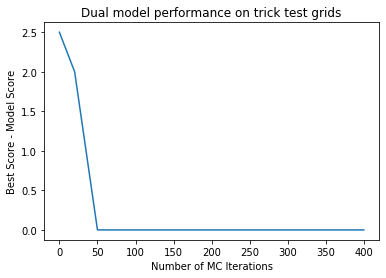

In [33]:
# Running dual model on the trick test grids given to humans
iters = [0,20, 50, 100, 200, 400]
dual_reward_differences = []
model_based_reward_differences = []
for n in iters:
    avg_diff = 0
    for ind, grid_init in trick_tests:
        best_reward = grid_init['best_reward']
        testgrid = grid.Grid(5,random=False, init_pos=grid_init)
        Q, policy = agent.mc_first_visit_control(testgrid.copy(), iters=n, nn_init=True,cutoff=0.4,softmax=True)
        _, _, model_reward = agent.run_final_policy(testgrid.copy(), Q, nn_init=True, display=False)
        avg_diff += best_reward - model_reward
    dual_reward_differences.append(avg_diff/ind)

plt.plot(iters, reward_differences) 
plt.xlabel("Number of MC Iterations")
plt.ylabel("Best Score - Model Score")
plt.title("Dual model performance on trick test grids")

Text(0.5, 1.0, 'Dual model performance on all test grids')

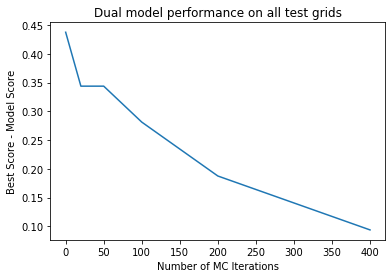

In [28]:
# Running dual model on all test grids
iters = [0,20, 50, 100, 200, 400]
dual_reward_differences = []
mc_reward_differences = []
for n in iters:
    dual_diff, mc_diff = 0, 0
    for ind, grid_init in all_test_list:
        best_reward = grid_init['best_reward']
        testgrid = grid.Grid(5,random=False, init_pos=grid_init)
        Q, policy = agent.mc_first_visit_control(testgrid.copy(), iters=n, nn_init=True,cutoff=0.4,softmax=True)
        _, _, dual_model_reward = agent.run_final_policy(testgrid.copy(), Q, nn_init=True, display=False)
        _, _, model_based_reward = agent.run_final_policy(testgrid.copy(), Q, nn_init=False, display=False)
        dual_diff += best_reward - dual_model_reward
        mc_diff += best_reward - model_based_reward
    dual_reward_differences.append(dual_diff/ind)
    mc_reward_differences.append(mc_diff/ind)
plt.plot(iters, dual_reward_differences, 'r')
plt.plot(iters, mc_reward_differences, 'b')
plt.xlabel("Number of MC Iterations")
plt.ylabel("Best Score - Model Score")
plt.title("Dual model performance on all test grids")

Text(0.5, 1.0, 'Dual model performance on trick test grids')

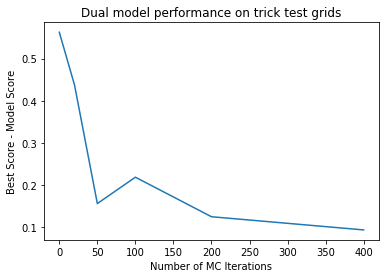

In [27]:
plt.plot(iters, reward_differences)
plt.xlabel("Number of MC Iterations")
plt.ylabel("Best Score - Model Score")
plt.title("Dual model performance on test grids")

Text(0.5, 1.0, 'Model based performance on all test grids')

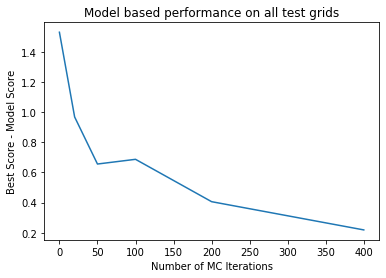

In [32]:
# Running model based on all test grids
iters = [0,20, 50, 100, 200, 400]
reward_differences = []
for n in iters:
    total_diff = 0
    for ind, grid_init in all_test_list:
        best_reward = grid_init['best_reward']
        testgrid = grid.Grid(5,random=False, init_pos=grid_init)
        Q, policy = agent.mc_first_visit_control(testgrid.copy(), iters=n, nn_init=False, softmax=False)
        _,_, model_reward = agent.run_final_policy(testgrid.copy(), Q,nn_init=False,display=False)
        total_diff += best_reward - model_reward
    reward_differences.append(total_diff/ind)
plt.plot(iters, reward_differences)
plt.xlabel("Number of MC Iterations")
plt.ylabel("Best Score - Model Score")
plt.title("Model based performance on all test grids")

In [ ]:
# Q what format do we want the model data to be in?
model_results = [] # item e.g. {'model':'constrained','grid_num':23,'reward':3,'best_reward':3,'id':10}
# Generate dual model "time constrained scenario"
for i in range(NUM_SIMULATIONS):
    n_iters = np.random.randint((20,30)) #choose a randome integer between 20 and 30
    for ind, grid in all_tests_list:
        testgrid = grid.Grid(5,random=False, init_pos=grid)
        Q, policy = agent.mc_first_visit_control(testgrid.copy(), iters=n, nn_init=False, softmax=False)
        _,_, model_reward = agent.run_final_policy(testgrid.copy(), Q,nn_init=False,display=False)
        constrained_grids[i] = (ind, model_reward)
        individual_info = {} #information for this particular model instantiation
        individual_info['id'] = i
        individual_info['model'] = 'pressure'
        individual_info['grid_num'] = ind
        individual_info['reward'] = model_reward
        individual_info['best_reward'] = grid['best_reward']
        model_results.append(individual_info)
        
for i in range(NUM_SIMULATIONS):
    n_iters = np.random.randint((200,250)) #choose a randome integer between 20 and 30
    for ind, grid in all_tests_list:
        testgrid = grid.Grid(5,random=False, init_pos=grid)
        Q, policy = agent.mc_first_visit_control(testgrid.copy(), iters=n, nn_init=False, softmax=False)
        _,_, model_reward = agent.run_final_policy(testgrid.copy(), Q,nn_init=False,display=False)
        constrained_grids[i] = (ind, model_reward)
        individual_info = {} #information for this particular model instantiation
        individual_info['id'] = i
        individual_info['model'] = 'delay'
        individual_info['grid_num'] = ind
        individual_info['reward'] = model_reward
        individual_info['best_reward'] = grid['best_reward']
        model_results.append(individual_info)

results_df = pd.DataFrame(model_results)
results_df.to_csv('dual_model_data_generation.csv') # really this should be in python file, not notebook